## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 2 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nirmala/Nirmala.ttf
/kaggle/input/hindi-text-short-summarization-corpus/train.csv
/kaggle/input/hindi-text-short-summarization-corpus/test.csv
/kaggle/input/hindi-stopwords/Hindi_STOPWORDS.txt


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
nRowsRead = None # specify 'None' if want to read whole file
# test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/kaggle/input/hindi-text-short-summarization-corpus/test.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'test.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 66653 rows and 2 columns


In [4]:
df.head(5)

,headline,article
0,"पठानकोट पहुंचे PM मोदी, एयरबेस का जायजा ले बॉर...",प्रधानमंत्री नरेंद्र मोदी पठानकोट एयरबेस पहुंच...
1,सचिन ने देशवासियों को समर्पित किया अपना दोहरा शतक,सचिन तेंदुलकर ने एकदिवसीय अंतरराष्ट्रीय क्रिके...
2,एनआईए करेगी छत्तीसगढ़ में सुरक्षा खामियों की ज...,केंद्रीय गृह राज्य मंत्री आर. पी. एन. सिंह ने ...
3,सीधी बात: शाह बोले- हमारा बस चलता तो अब तक मं...,भारतीय जनता पार्टी (बीजेपी) के राष्ट्रीय अध्यक...
4,"ऋषभ पंत के पास यूनिक टैलेंट, उसके साथ छेड़छाड़ न...",ऋषभ पंत की कभी कभार इस बात के लिए आलोचना की जा...


In [5]:
# nRowsRead = None # specify 'None' if want to read whole file
# # train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
# df = pd.read_csv('/kaggle/input/hindi-text-short-summarization-corpus/train.csv', delimiter=',', nrows = nRowsRead)
# df.dataframeName = 'train.csv'
# nRow, nCol = df.shape
# print(f'There are {nRow} rows and {nCol} columns')

In [6]:
# df.head(5)

In [7]:
df = pd.DataFrame(df['article'])

In [8]:
df.head()

,article
0,प्रधानमंत्री नरेंद्र मोदी पठानकोट एयरबेस पहुंच...
1,सचिन तेंदुलकर ने एकदिवसीय अंतरराष्ट्रीय क्रिके...
2,केंद्रीय गृह राज्य मंत्री आर. पी. एन. सिंह ने ...
3,भारतीय जनता पार्टी (बीजेपी) के राष्ट्रीय अध्यक...
4,ऋषभ पंत की कभी कभार इस बात के लिए आलोचना की जा...


In [9]:
# df = pd.DataFrame(df['article'])

In [10]:
# df = df.append(df1)

In [11]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 66653 rows and 1 columns


In [12]:
# df.to_csv('df_main.csv',index=False)

![Function to preprocess text](http://)

In [13]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = text.replace('\t', '')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
        
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    #text = text.split(' ')
    #text = [x for x in text if(x!='')]
    #text.insert(0,'<sos>')
    #text.insert(len(text),'<eos>')
    return text

In [14]:
import pandas as pd
import torch
import random
import numpy as np

In [15]:
# train_data_src = df['headline']
train_data_trg = df['article']

In [16]:
# tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are headlines
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg] # these are articles


In [17]:
with open("/kaggle/input/hindi-stopwords/Hindi_STOPWORDS.txt",encoding='utf-8') as f:
    stopword= f.read().strip('\ufeff')
stopword = stopword.split(", ")
stopword = [i.strip("'") for i in stopword]
print(stopword)

['अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा', 'दे', 'देकर', 'रह', 'कह', 'कहा', "बात' ", 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह', 'मेरे', 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', "इतयादि' ,'यहाँ", 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग', 'बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न', '

In [18]:
text = ''

for article in tokenized_corpus_trg:
    text += article

In [19]:
from string import punctuation
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

stopwords = set(stopword)

tokens = word_tokenize(text)
customStopWords = set(list(stopwords) + list(punctuation+'।'+'॥'))
wordsWOstopwords = [word for word in tokens if word not in customStopWords]
#removing numeric digits from list of words
wordsWOstopwords = [i for i in wordsWOstopwords if not i.isdigit()]
# freq = FreqDist(wordsWOstopwords)

In [20]:
print(wordsWOstopwords[:10])
corpus = wordsWOstopwords

['प्रधानमंत्री', 'नरेंद्र', 'मोदी', 'पठानकोट', 'एयरबेस', 'पहुंच', 'एयरबेस', 'सुरक्षा', 'हालात', 'जायजा']


In [21]:
print(len(tokens), len(wordsWOstopwords))

23059814 12740563


In [22]:
from matplotlib.font_manager import FontProperties
import matplotlib as mtp

mtp.rcParams['figure.dpi'] = 640
hindi_font = FontProperties(fname = "../input/nirmala/Nirmala.ttf")

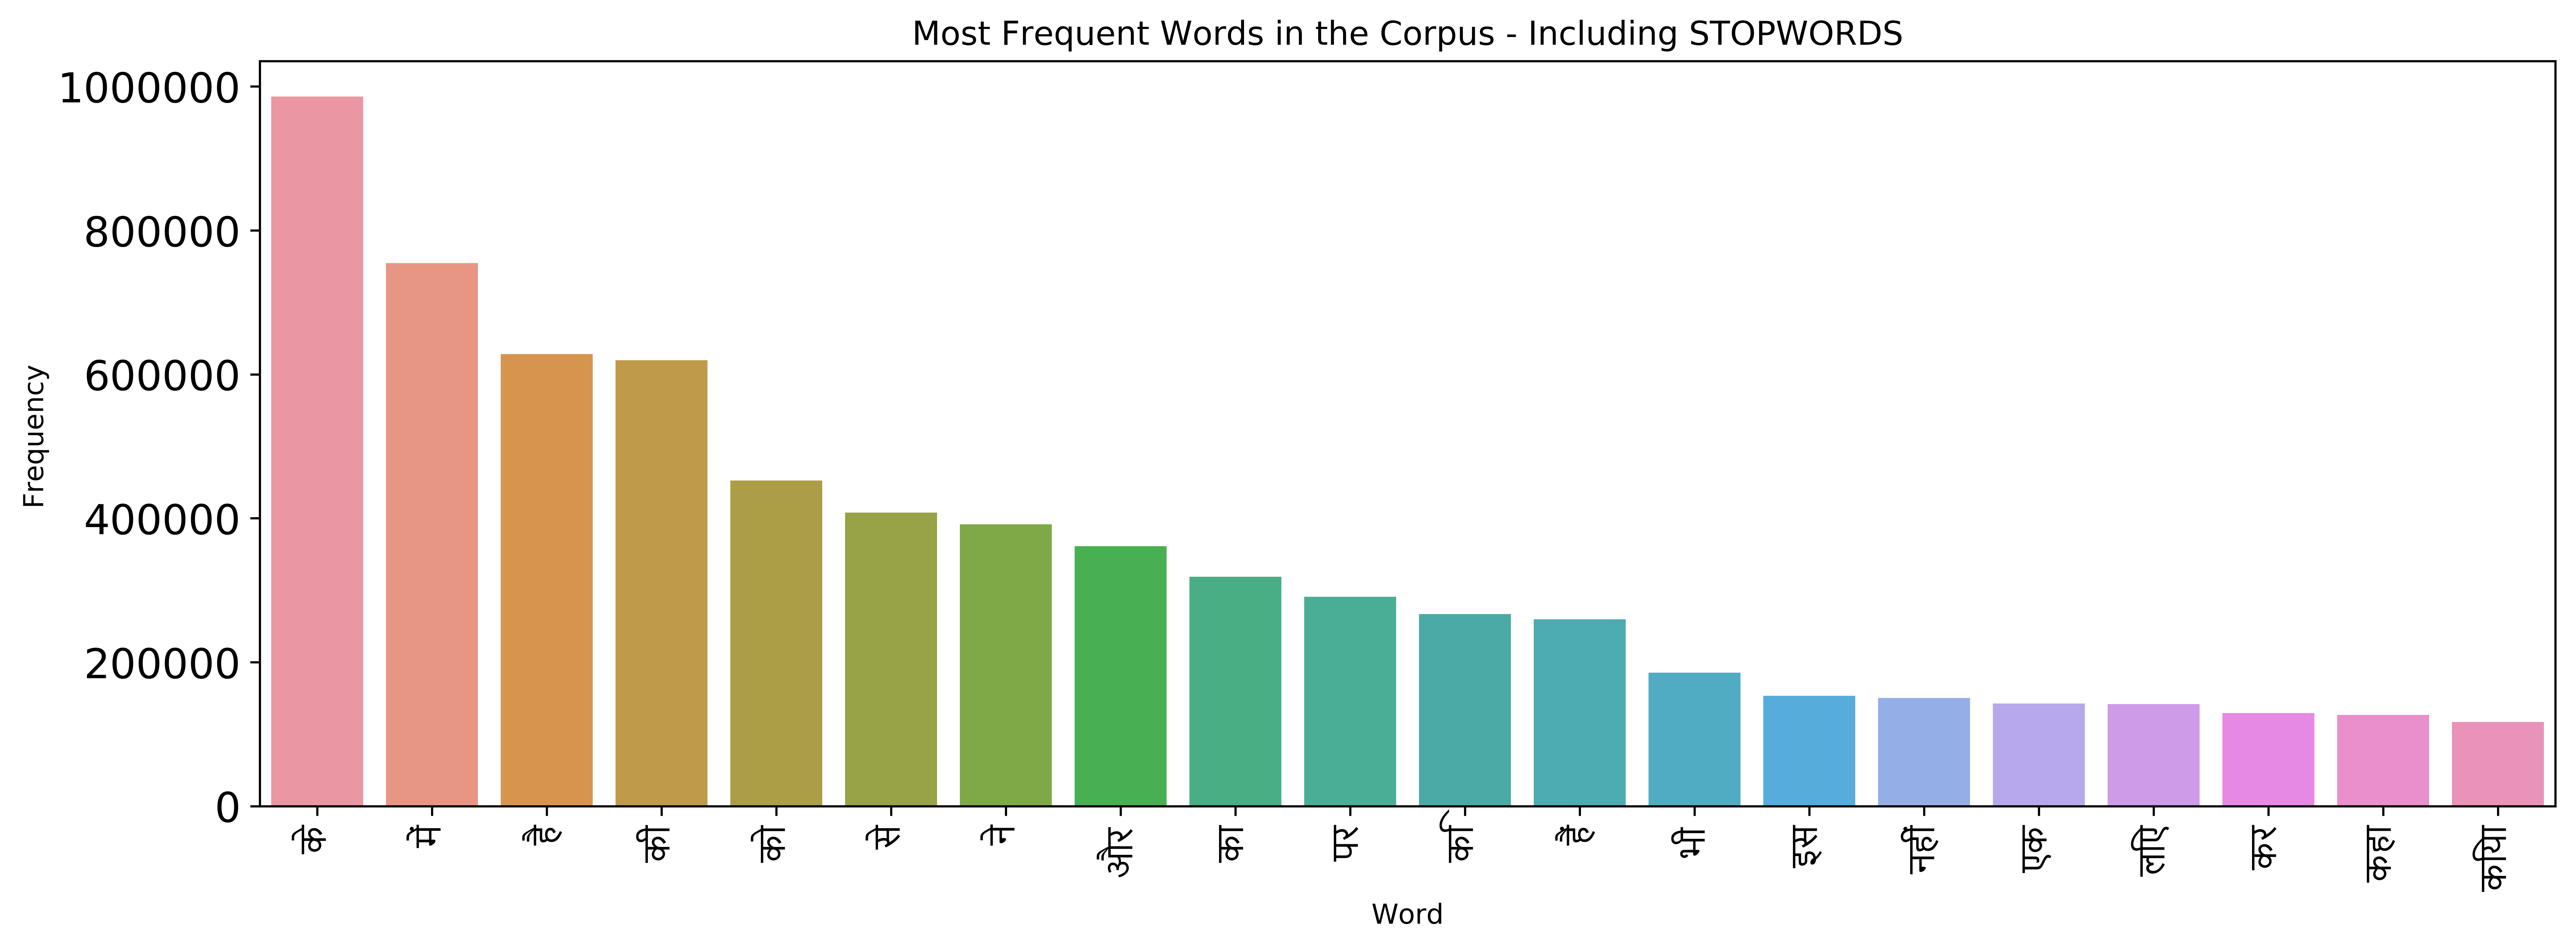

In [23]:
import seaborn as sns

title = "Most Frequent Words in the Corpus - Including STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(tokens)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=640)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

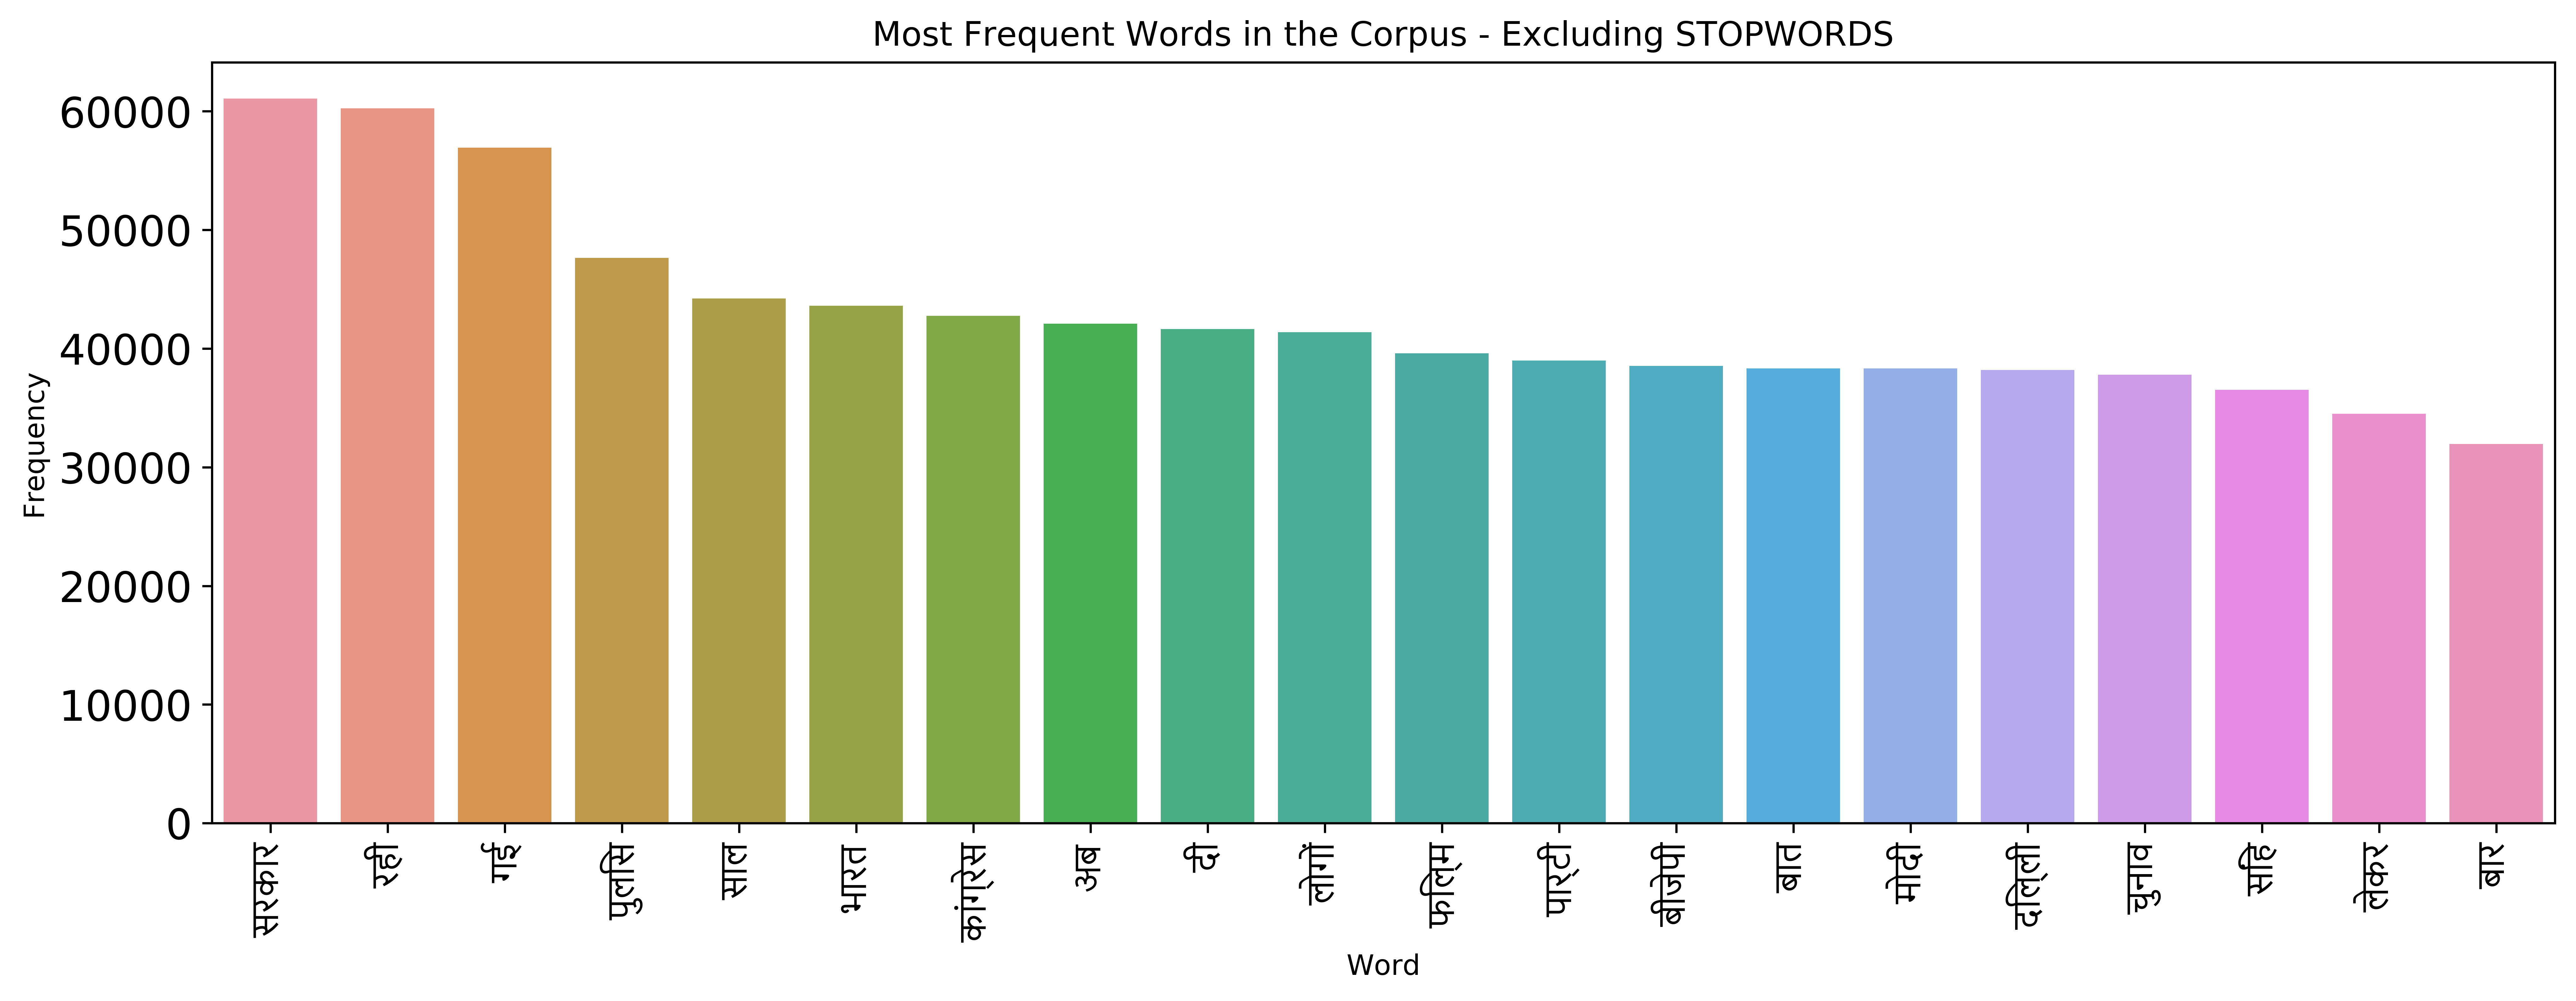

In [24]:
title = "Most Frequent Words in the Corpus - Excluding STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(corpus)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=640)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

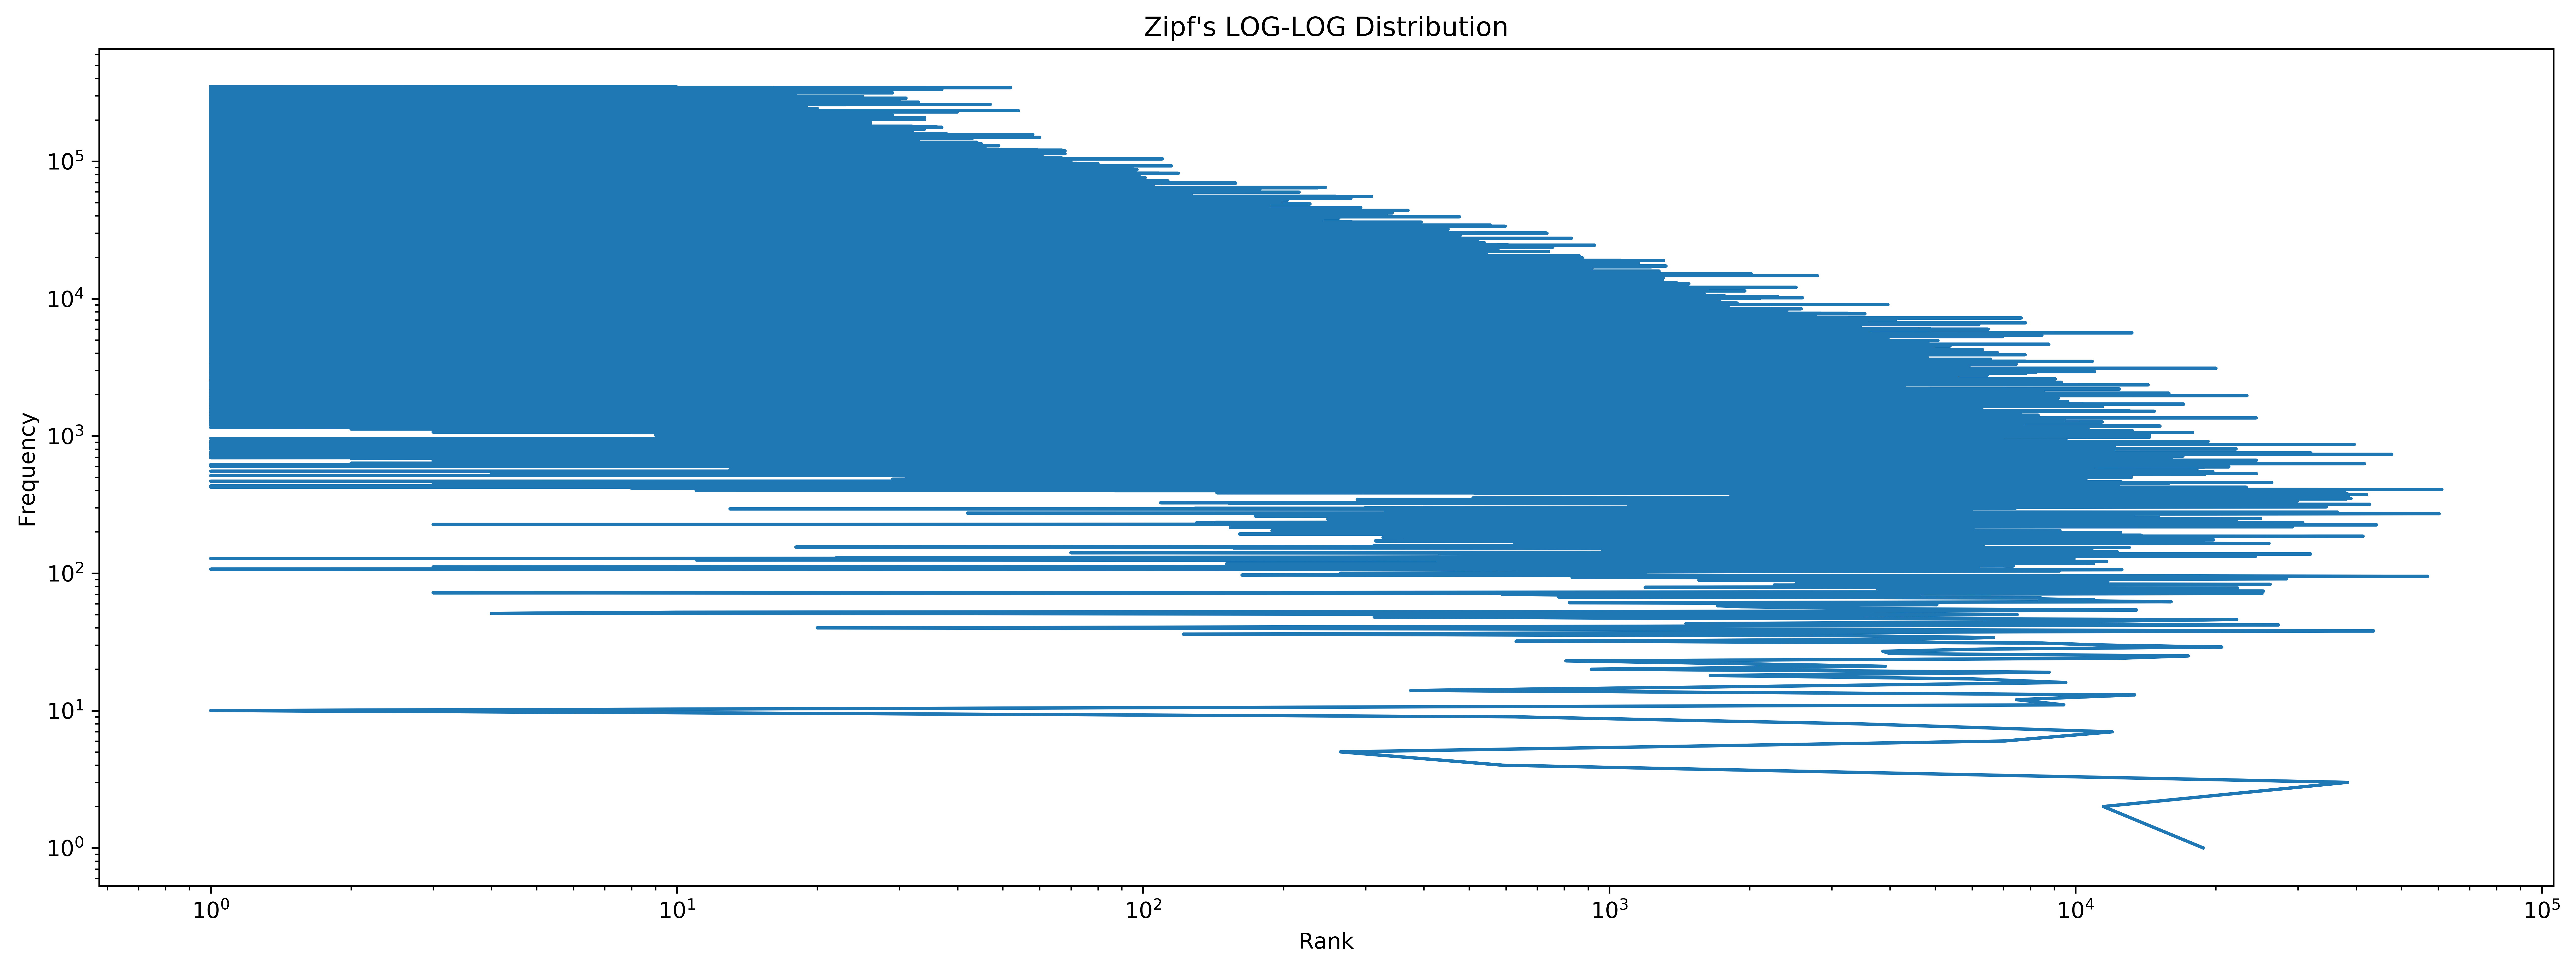

In [25]:
fd=FreqDist()
    
#Creating ranks and frequencies
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])
        
#Plotting the LOG-LOG distribution
plt.figure(figsize=(20,7), dpi=640)
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's LOG-LOG Distribution")
plt.show()

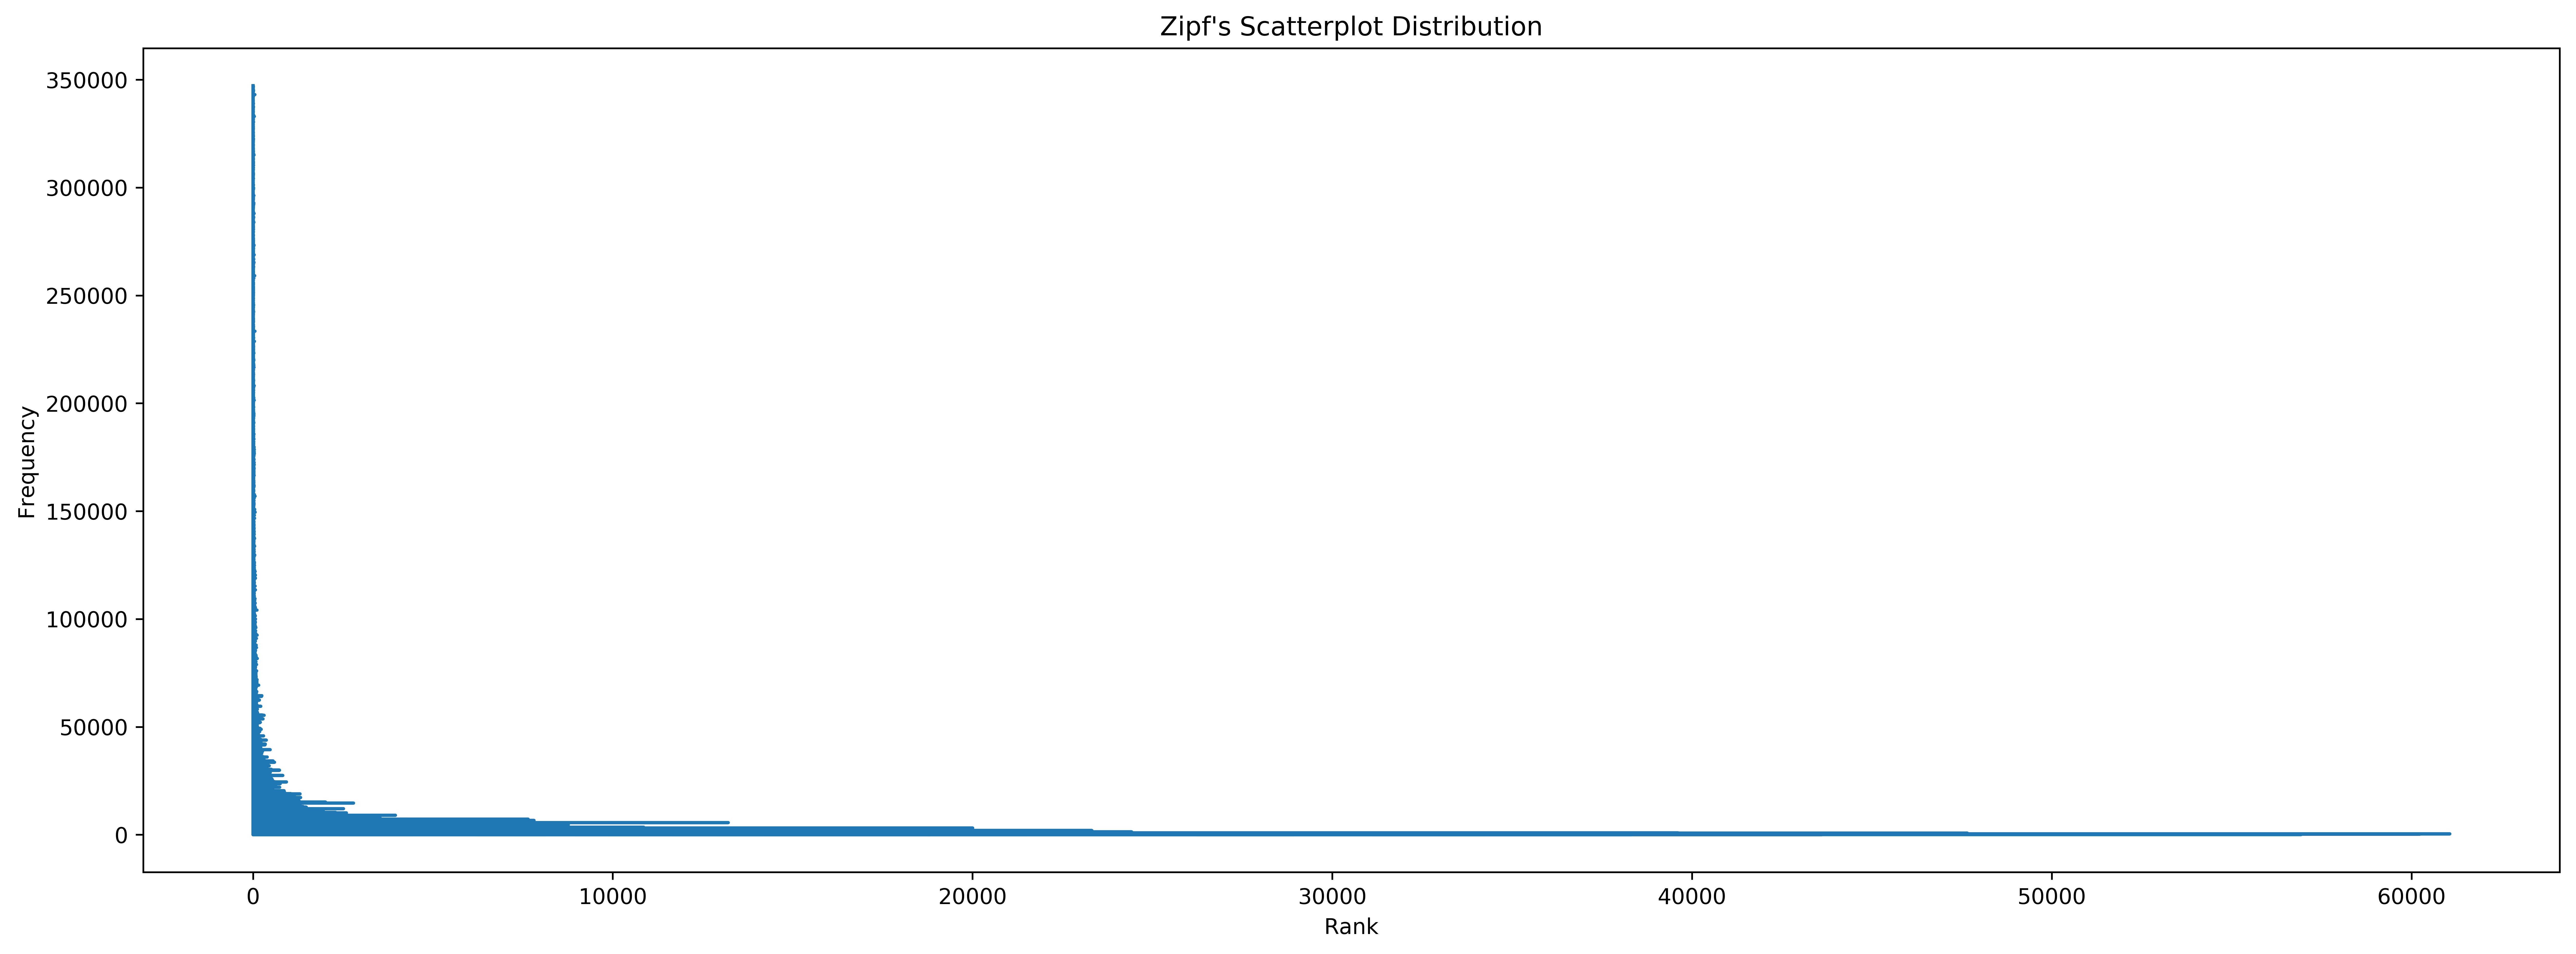

In [26]:
#Plotting the Scatterplot distribution
plt.figure(figsize=(20,7), dpi=640)
plt.plot(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Scatterplot Distribution")
plt.show()

Heaps Law


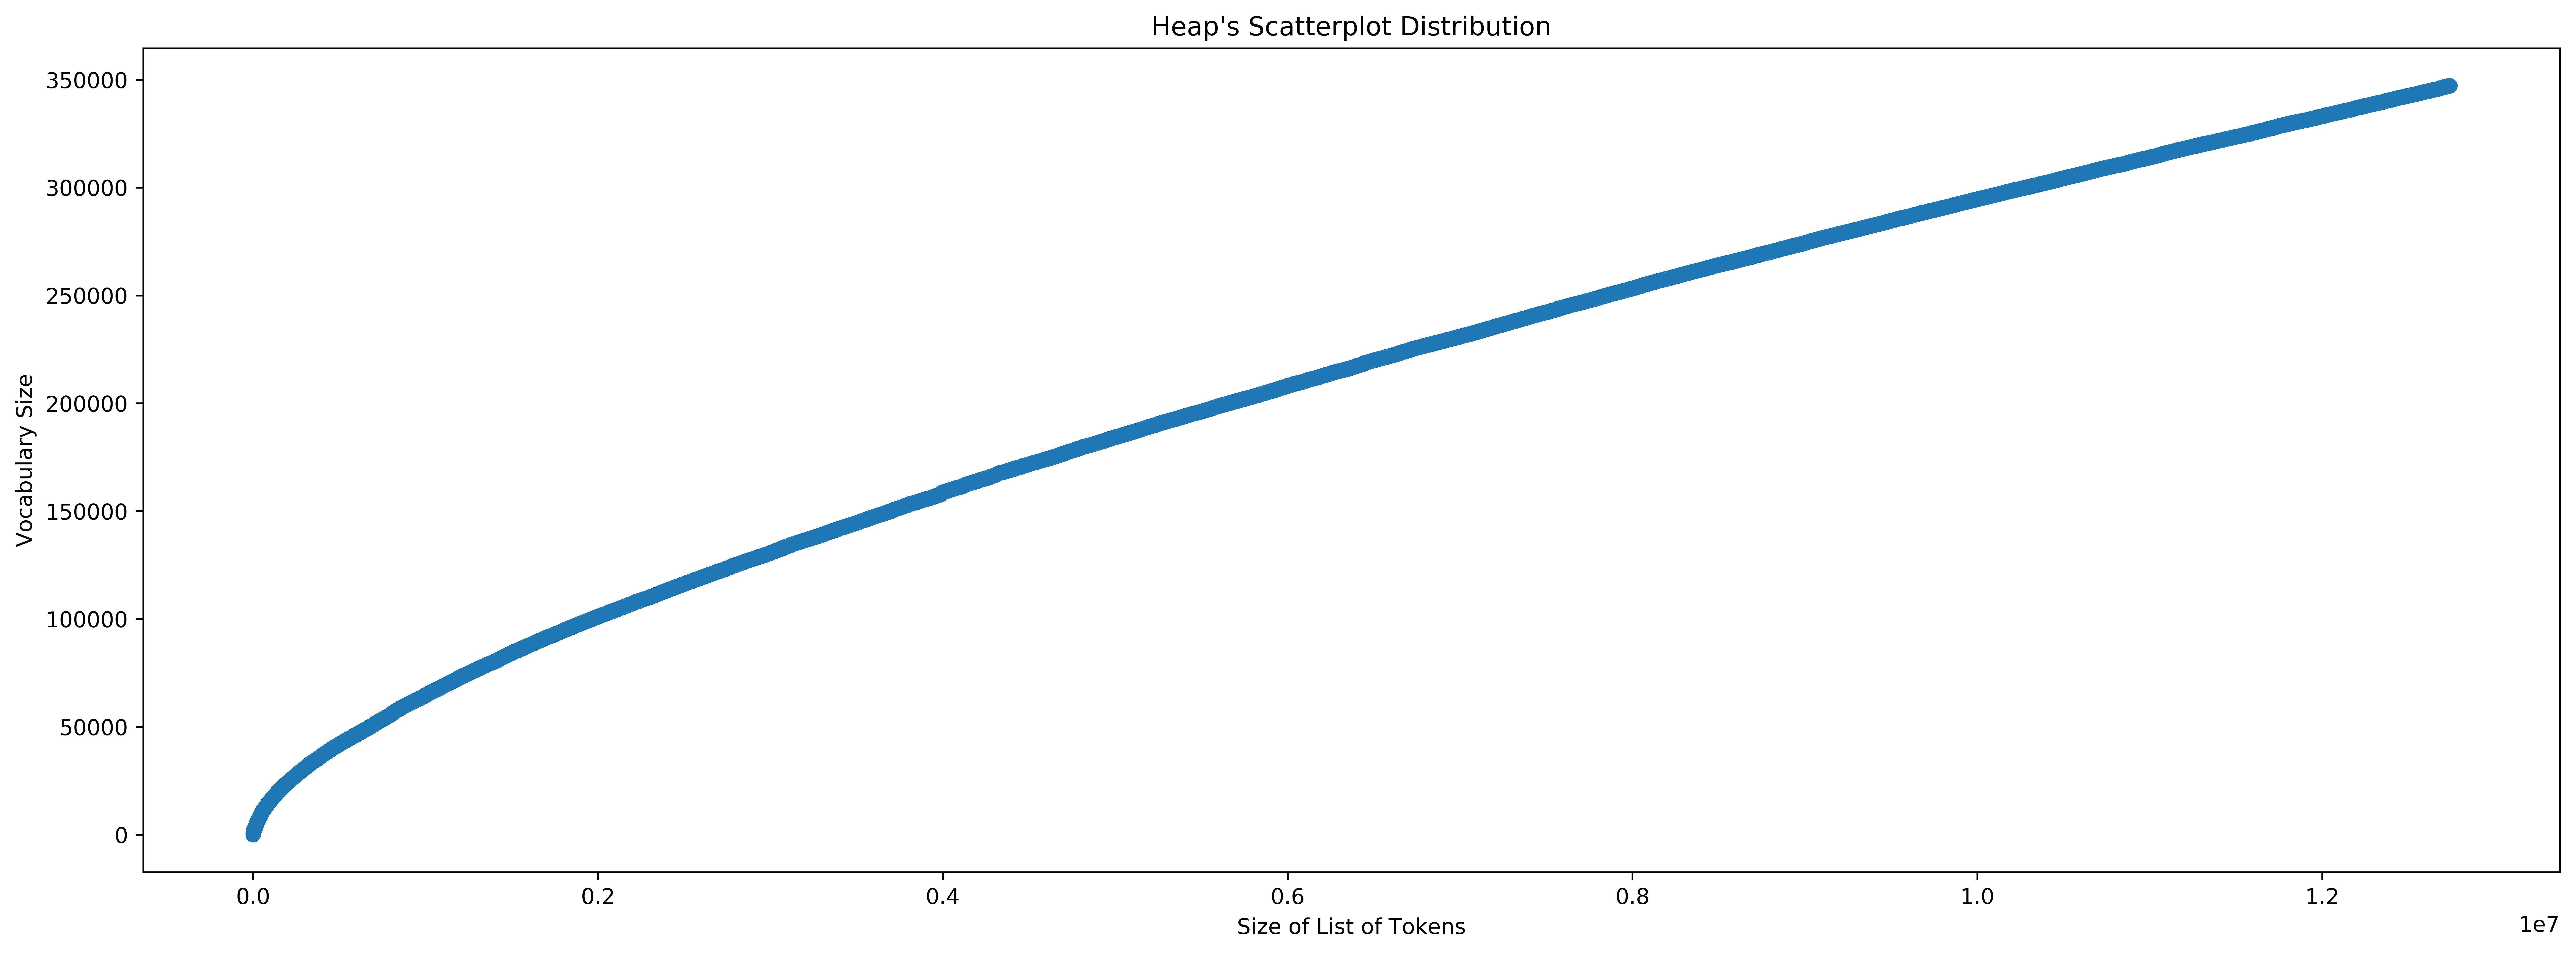

In [27]:
'''Heaps Law'''
    
print("Heaps Law")
    
uniq = set()
    
Tn = []
V = []
    
for i, token in enumerate(corpus):
    uniq.add(token)
    Tn.append(i)   #Tn: Tokens
    V.append(len(uniq))   #Vocab
    #print(i, len(uniq))
        
#Plotting the Scatterplot distribution for Heap's Law
plt.figure(figsize=(20,7), dpi=640)
plt.scatter(Tn,V)
plt.xlabel('Size of List of Tokens')
plt.ylabel('Vocabulary Size')
plt.title("Heap's Scatterplot Distribution")
plt.show()